In [2]:
import seaborn as sns

df = sns.load_dataset('titanic')
nan_deck = df['deck'].value_counts(dropna=False)
print(nan_deck)

NaN    688
C       59
B       47
D       33
E       32
A       15
F       13
G        4
Name: deck, dtype: int64


In [3]:
print(df.head().isnull())

   survived  pclass    sex    age  sibsp  parch   fare  ...  class    who  adult_male   deck  embark_town  alive  alone
0     False   False  False  False  False  False  False  ...  False  False       False   True        False  False  False
1     False   False  False  False  False  False  False  ...  False  False       False  False        False  False  False
2     False   False  False  False  False  False  False  ...  False  False       False   True        False  False  False
3     False   False  False  False  False  False  False  ...  False  False       False  False        False  False  False
4     False   False  False  False  False  False  False  ...  False  False       False   True        False  False  False

[5 rows x 15 columns]


In [4]:
print(df.head().notnull())

   survived  pclass   sex   age  sibsp  parch  fare  ...  class   who  adult_male   deck  embark_town  alive  alone
0      True    True  True  True   True   True  True  ...   True  True        True  False         True   True   True
1      True    True  True  True   True   True  True  ...   True  True        True   True         True   True   True
2      True    True  True  True   True   True  True  ...   True  True        True  False         True   True   True
3      True    True  True  True   True   True  True  ...   True  True        True   True         True   True   True
4      True    True  True  True   True   True  True  ...   True  True        True  False         True   True   True

[5 rows x 15 columns]


In [5]:
print(df.head().isnull().sum(axis=0))

survived       0
pclass         0
sex            0
age            0
sibsp          0
parch          0
fare           0
embarked       0
class          0
who            0
adult_male     0
deck           3
embark_town    0
alive          0
alone          0
dtype: int64


In [6]:
print(df.isnull().sum(axis=0))

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64


In [7]:
df_thresh = df.dropna(axis=1, thresh=500)
print(df_thresh.columns)

Index(['survived', 'pclass', 'sex', 'age', 'sibsp', 'parch', 'fare',
       'embarked', 'class', 'who', 'adult_male', 'embark_town', 'alive',
       'alone'],
      dtype='object')


In [8]:
df_age = df.dropna(subset=['age'], how='any', axis=0)
print(len(df_age))

714


In [11]:
df = sns.load_dataset('titanic')
print(df['age'].head(10))
mean_age = df['age'].mean(axis=0)
df['age'].fillna(mean_age, inplace=True)
print(df['age'].head(10))

0    22.0
1    38.0
2    26.0
3    35.0
4    35.0
5     NaN
6    54.0
7     2.0
8    27.0
9    14.0
Name: age, dtype: float64
0    22.000000
1    38.000000
2    26.000000
3    35.000000
4    35.000000
5    29.699118
6    54.000000
7     2.000000
8    27.000000
9    14.000000
Name: age, dtype: float64


In [13]:
df = sns.load_dataset('titanic')
print(df['embark_town'][825:830])

df['embark_town'].fillna(method='ffill', inplace=True)
print(df['embark_town'][825:830])

825     Queenstown
826    Southampton
827      Cherbourg
828     Queenstown
829            NaN
Name: embark_town, dtype: object
825     Queenstown
826    Southampton
827      Cherbourg
828     Queenstown
829     Queenstown
Name: embark_town, dtype: object


In [18]:
import pandas as pd
df = pd.DataFrame({'c1':['a','a','b','a','b'], 'c2':[1, 1, 1, 2, 2],'c3':[1,1,2,2,2]})

print(df)
print('\n')

df_dup = df.duplicated()
print(df_dup)

  c1  c2  c3
0  a   1   1
1  a   1   1
2  b   1   2
3  a   2   2
4  b   2   2


0    False
1     True
2    False
3    False
4    False
dtype: bool


In [22]:
import pandas as pd
df = pd.read_csv('./data/auto-mpg.csv', header=None)
df.columns = ['mpg','cylinders','displacement','horsepower','weight',
              'acceleration','model year','origin','name']
print(df.head(3))
print('\n')

mpg_to_kpl = 1.60934/3.78541

df['kpl'] = df['mpg'] * mpg_to_kpl
print(df.head(3))
print('\n')

df['kpl'] = df['kpl'].round(2)
print(df.head(3))

    mpg  cylinders  displacement horsepower  weight  acceleration  model year  origin                       name
0  18.0          8         307.0      130.0  3504.0          12.0          70       1  chevrolet chevelle malibu
1  15.0          8         350.0      165.0  3693.0          11.5          70       1          buick skylark 320
2  18.0          8         318.0      150.0  3436.0          11.0          70       1         plymouth satellite


    mpg  cylinders  displacement horsepower  ...  model year  origin                       name       kpl
0  18.0          8         307.0      130.0  ...          70       1  chevrolet chevelle malibu  7.652571
1  15.0          8         350.0      165.0  ...          70       1          buick skylark 320  6.377143
2  18.0          8         318.0      150.0  ...          70       1         plymouth satellite  7.652571

[3 rows x 10 columns]


    mpg  cylinders  displacement horsepower  weight  acceleration  model year  origin            

In [38]:
print(df.dtypes)

mpg             float64
cylinders         int64
displacement    float64
horsepower       object
weight          float64
acceleration    float64
model year        int64
origin            int64
name             object
kpl             float64
dtype: object


In [36]:
# titanic 자료를 읽어 titanic에 저장한 후
# age 컬럼의 Nan은 평균값으로 대체
# age 컬럼을 다음과 같이 구간 분리 -> age_gubun 컬럼을 titanic 에 추가

bins = [0,15,25,35,60,99]
labels = ['미성년자', '청년', '중년', '장년', '노년']

titanic = sns.load_dataset('titanic')
print(titanic.isnull().sum(0))

titanic.dropna(axis=1, thresh=len(titanic)//2, inplace=True)
print(titanic.columns)

mean_age = round(titanic['age'].mean(axis=0))
print(mean_age)

titanic['age'].fillna(mean_age, inplace=True)

titanic['age_gubun'] = pd.cut(x=titanic['age'], bins=bins, labels=labels, include_lowest=True)
print(titanic.head())

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64
Index(['survived', 'pclass', 'sex', 'age', 'sibsp', 'parch', 'fare',
       'embarked', 'class', 'who', 'adult_male', 'embark_town', 'alive',
       'alone'],
      dtype='object')
30
   survived  pclass     sex   age  sibsp  parch     fare  ...  class    who adult_male  embark_town alive  alone  age_gubun
0         0       3    male  22.0      1      0   7.2500  ...  Third    man       True  Southampton    no  False         청년
1         1       1  female  38.0      1      0  71.2833  ...  First  woman      False    Cherbourg   yes  False         장년
2         1       3  female  26.0      0      0   7.9250  ...  Third  woman      False  Southampton   yes   True         중년
3         1       1  f

In [41]:
import numpy as np

In [45]:
df = pd.read_csv('./data/auto-mpg.csv', header=None)
df.columns = ['mpg','cylinders','displacement','horsepower','weight',
              'acceleration','model year','origin','name']
df['horsepower'].replace('?', np.nan, inplace=True)
df.dropna(subset=['horsepower'], axis=0, inplace=True)
df['horsepower'] = df['horsepower'].astype('float')

count, bin_dividers = np.histogram(df['horsepower'], bins=3)
print(bin_dividers)

bin_names = ['저출력', '보통출력', '고출력']
df['hp_bin'] = pd.cut(x=df['horsepower'], bins=bin_dividers, labels=bin_names, include_lowest=True)
print(df[['horsepower', 'hp_bin']].head(15))

[ 46.         107.33333333 168.66666667 230.        ]
    horsepower hp_bin
0        130.0   보통출력
1        165.0   보통출력
2        150.0   보통출력
3        150.0   보통출력
4        140.0   보통출력
5        198.0    고출력
6        220.0    고출력
7        215.0    고출력
8        225.0    고출력
9        190.0    고출력
10       170.0    고출력
11       160.0   보통출력
12       150.0   보통출력
13       225.0    고출력
14        95.0    저출력


In [47]:
horsepower_dummies = pd.get_dummies(df['hp_bin'])
print(horsepower_dummies.head(15))

    저출력  보통출력  고출력
0     0     1    0
1     0     1    0
2     0     1    0
3     0     1    0
4     0     1    0
5     0     0    1
6     0     0    1
7     0     0    1
8     0     0    1
9     0     0    1
10    0     0    1
11    0     1    0
12    0     1    0
13    0     0    1
14    1     0    0


In [49]:
from sklearn import preprocessing

label_encoder = preprocessing.LabelEncoder()
onehot_encoder = preprocessing.OneHotEncoder()

onehot_labeled = label_encoder.fit_transform(df['hp_bin'])
print(onehot_labeled)

onehot_reshaped = onehot_labeled.reshape(len(onehot_labeled),1)
print(onehot_reshaped)

onehot_fitted = onehot_encoder.fit_transform(onehot_reshaped)
print(onehot_fitted)

[1 1 1 1 1 0 0 0 0 0 0 1 1 0 2 2 2 2 2 2 2 2 2 1 2 0 0 0 0 2 2 2 2 2 2 2 2
 1 0 1 1 0 0 0 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 1 0 1 1 1 0 1 1 0 2 1 1 1
 1 1 2 2 2 2 2 2 2 2 0 1 1 1 1 0 1 1 1 0 0 0 2 2 2 2 2 2 1 1 0 0 2 2 2 2 2
 2 2 2 1 0 2 2 2 1 1 1 1 0 2 2 2 2 2 2 2 2 1 2 1 1 1 1 1 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 0 1 1 1 1 2 1 2 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 1 2 2 2 2 2 2
 1 1 1 1 2 2 2 2 2 2 2 2 2 2 1 2 2 2 2 2 2 1 2 1 1 0 1 1 1 2 2 2 2 2 1 1 1
 1 1 2 2 2 0 0 0 1 2 2 2 2 2 2 2 2 2 1 1 2 2 2 2 2 1 1 1 2 2 2 2 2 2 2 2 1
 1 1 1 1 1 2 2 2 2 2 2 2 2 2 1 1 1 2 2 1 2 2 2 1 1 1 1 1 1 1 1 1 2 2 2 2 2
 1 2 2 2 2 2 2 2 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 1 2 2
 2 2 2 2 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 1 2 2 1 2 2 2 2 2 2 2 2]
[[1]
 [1]
 [1]
 [1]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [1]
 [0]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [1]
 [2]
 [0]
 [0]
 [0]
 [0]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [1]
 [0]
 [1]
 [1]

In [59]:
# 6. 시계열 데이터
# 문자형 날짜를 datetime 형으로 변경
# to_datetime()

df = pd.read_csv('./data/stock-data.csv')
print(df.head())
print(df.info())   # Date 의 자료형이 object -> datetime 으로 변경 : pd.to_datetime(자료)

         Date  Close  Start   High    Low  Volume
0  2018-07-02  10100  10850  10900  10000  137977
1  2018-06-29  10700  10550  10900   9990  170253
2  2018-06-28  10400  10900  10950  10150  155769
3  2018-06-27  10900  10800  11050  10500  133548
4  2018-06-26  10800  10900  11000  10700   63039
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Date    20 non-null     object
 1   Close   20 non-null     int64 
 2   Start   20 non-null     int64 
 3   High    20 non-null     int64 
 4   Low     20 non-null     int64 
 5   Volume  20 non-null     int64 
dtypes: int64(5), object(1)
memory usage: 1.1+ KB
None


In [60]:
df['new_Date'] = pd.to_datetime(df['Date'])
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   Date      20 non-null     object        
 1   Close     20 non-null     int64         
 2   Start     20 non-null     int64         
 3   High      20 non-null     int64         
 4   Low       20 non-null     int64         
 5   Volume    20 non-null     int64         
 6   new_Date  20 non-null     datetime64[ns]
dtypes: datetime64[ns](1), int64(5), object(1)
memory usage: 1.2+ KB
None


In [ ]:
# Date 칼럼을 삭제 -> new_Date컬럼을 인덱스로
df.drop('Date', axis=1, inplace=True)
df.set_index('new_Date', inplace=True)
print(df.head())

In [66]:
# %load matplot.py
import matplotlib.pyplot as plt
# matplotlib 폰트설정
plt.rc('font', family='D2Coding')



In [71]:
# Timestamp를 period로 변환
dates = ['2019-01-01', '2020-03-01', '2021-06-01']
to_dates = pd.to_datetime(dates)
print(to_dates)
pr_day = to_dates.to_period(freq='D')
print(pr_day)
pr_month = to_dates.to_period(freq='M')
print(pr_month)
pr_year = to_dates.to_period(freq='A')
print(pr_year)

DatetimeIndex(['2019-01-01', '2020-03-01', '2021-06-01'], dtype='datetime64[ns]', freq=None)
PeriodIndex(['2019-01-01', '2020-03-01', '2021-06-01'], dtype='period[D]')
PeriodIndex(['2019-01', '2020-03', '2021-06'], dtype='period[M]')
PeriodIndex(['2019', '2020', '2021'], dtype='period[A-DEC]')


In [130]:
df = pd.read_csv('./data/stock-data.csv')
df['new_Date'] = pd.to_datetime(df['Date'])
print(df.head())
print('\n')

df['Year'] = df['new_Date'].dt.year
df['Month'] = df['new_Date'].dt.month
df['Day'] = df['new_Date'].dt.day
print(df.head())
print('\n')

         Date  Close  Start   High    Low  Volume   new_Date
0  2018-07-02  10100  10850  10900  10000  137977 2018-07-02
1  2018-06-29  10700  10550  10900   9990  170253 2018-06-29
2  2018-06-28  10400  10900  10950  10150  155769 2018-06-28
3  2018-06-27  10900  10800  11050  10500  133548 2018-06-27
4  2018-06-26  10800  10900  11000  10700   63039 2018-06-26


         Date  Close  Start   High    Low  Volume   new_Date  Year  Month  Day
0  2018-07-02  10100  10850  10900  10000  137977 2018-07-02  2018      7    2
1  2018-06-29  10700  10550  10900   9990  170253 2018-06-29  2018      6   29
2  2018-06-28  10400  10900  10950  10150  155769 2018-06-28  2018      6   28
3  2018-06-27  10900  10800  11050  10500  133548 2018-06-27  2018      6   27
4  2018-06-26  10800  10900  11000  10700   63039 2018-06-26  2018      6   26




In [131]:
# 시도별 인구데이터에 대한 전처리

In [151]:
# 자료 불러오기
df = pd.read_excel('./data/시도별 전출입 인구수.xlsx')
df.drop(index=0, inplace=True)

# Nan 처리
df.전출지별.fillna(method='ffill', inplace=True)

# - 를 0으로 변경
df.replace('-', 0, inplace=True)

df.rename(columns={'전출지별':'전출지', '전입지별':'전입지'}, inplace=True)

df_sido = df[df['전출지'] != df['전입지']]
# df_sido = df[(df['전출지'] != '전국') & (df['전입지'] != '전국')]
print(df_sido.head(3))

  전출지    전입지     1970     1971     1972     1973  ...     2012     2013     2014     2015     2016     2017
2  전국  서울특별시  1742813  1671705  1349333  1831858  ...  1555281  1520090  1573594  1589431  1515602  1472937
3  전국  부산광역시   448577   389797   362202   482061  ...   461042   478451   485710   507031   459015   439073
4  전국  대구광역시        0        0        0        0  ...   348642   351873   350213   351424   328228   321182

[3 rows x 50 columns]


In [168]:
df_seoul = df_sido[df_sido['전출지'] == '서울특별시']
df_seoul = df_seoul.drop('전출지', axis=1)
df_seoul.set_index('전입지', inplace=True)
df_seoul = df_seoul.drop('전국', axis=0)
df_temp = df_seoul.T[['강원도', '충청북도', '충청남도']]

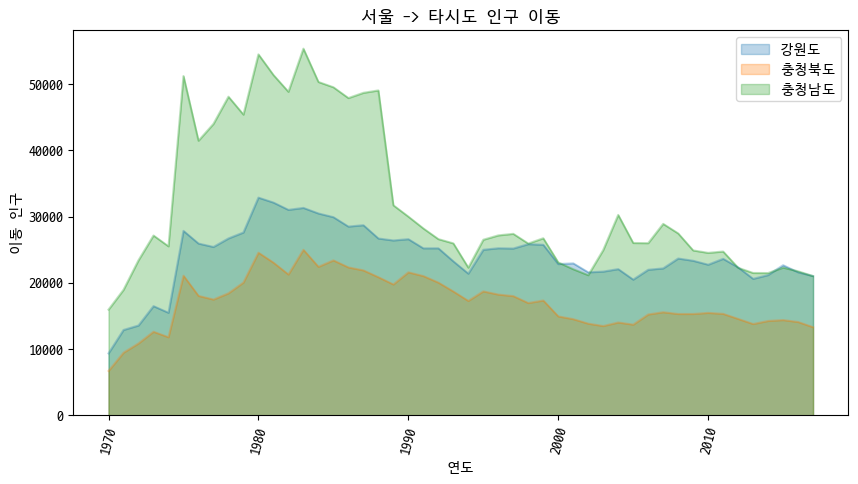

In [177]:
df_temp.plot(kind='area', figsize=(10,5), alpha=0.3, stacked=False)
plt.title('서울 -> 타시도 인구 이동')
plt.ylabel('이동 인구')
plt.xlabel('연도')
plt.tick_params(axis='x', rotation=75)
plt.legend()

           2000                                           ...                                                
전입지         강원도      경기도    경상남도    경상북도   광주광역시   대구광역시  ...   인천광역시    전라남도    전라북도 제주특별자치도    충청남도    충청북도
전출지                                                       ...                                                
강원도      171050    31013    2636    4539     974    2082  ...    5956    1867    1618     534    3450    5512
경기도       26514  1284156   10948   13654    8949    8595  ...   67516   18535   18854    3852   31988   19900
경상남도       2730    17565  329812   10045    1350    9712  ...    3526    4543    2164    1546    3221    2165
경상북도       4556    21345    8869  247544     944   59687  ...    4370    2027    1325     854    3186    4511
광주광역시       964    12520    1325     670  198924     528  ...    2736   53374    6382     771    1252     742
대구광역시      1889    13071    7977   52556     531  367458  ...    2209     971    1016     701    2087    1824
대전광역시     

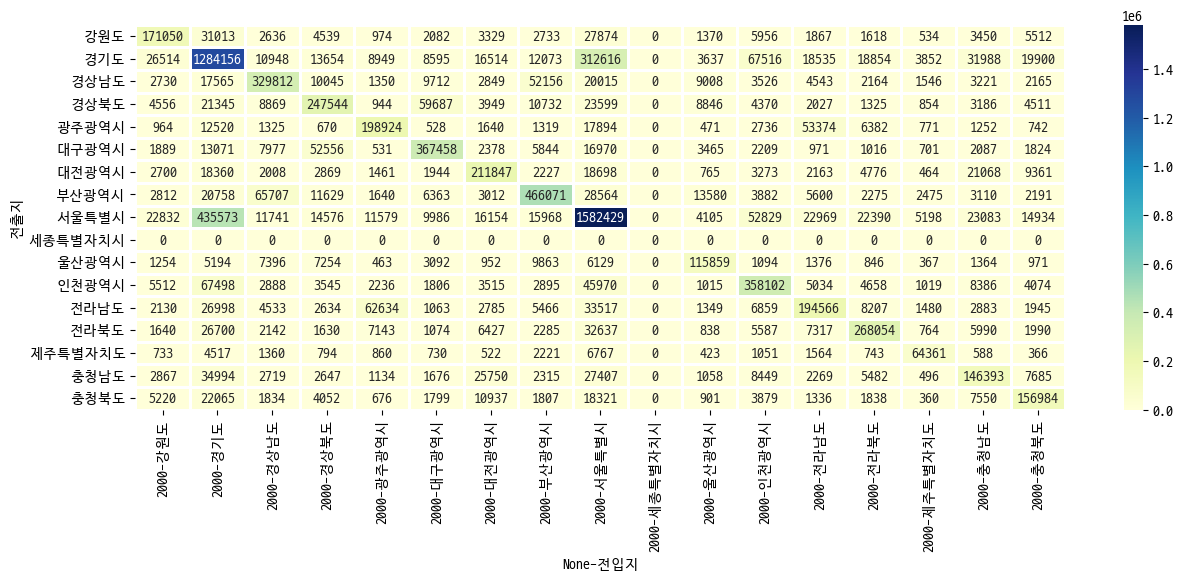

In [194]:
df_heat = df[(df['전출지'] != '전국') & (df['전입지'] != '전국')]
plt.figure(figsize=(15,5))
table = df_heat.pivot_table(values=['2000'], index=['전출지'], columns=['전입지'], aggfunc='mean')
sns.heatmap(table, annot=True, cmap = 'YlGnBu', linewidths=1, fmt='d', cbar=True)
plt.show()

In [225]:
df_seoul.T.loc[map(str, list(range(1981,1991,1)))]

전입지,부산광역시,대구광역시,인천광역시,광주광역시,대전광역시,울산광역시,세종특별자치시,경기도,강원도,충청북도,충청남도,전라북도,전라남도,경상북도,경상남도,제주특별자치도
1981,30238,14813,54879,0,0,0,0,252073,32116,23049,51369,39745,57645,30928,28795,5229
1982,30035,14702,45878,0,0,0,0,320174,31013,21256,48834,37169,55408,27440,28250,5276
1983,31141,16744,57958,0,0,0,0,400875,31308,24986,55344,39175,57737,29601,30485,6373
1984,28498,14033,66715,0,0,0,0,352238,30470,22416,50318,33460,52779,26842,27988,5671
1985,27318,13861,67890,0,0,0,0,390265,29911,23391,49520,34147,52629,26297,25792,5445
1986,26235,14210,58591,11478,0,0,0,412535,28489,22329,47888,33661,41082,26221,26002,5123
1987,26649,14515,58728,12324,0,0,0,405220,28699,21882,48678,34039,42667,27844,26970,5330
1988,25188,13470,68068,14134,0,0,0,415174,26691,20853,49038,36159,40695,26235,26801,5627
1989,22574,13666,73338,16784,16281,0,0,412933,26394,19753,31707,30538,36188,22374,24189,5894
1990,22005,12219,103533,16416,19028,0,0,473889,26591,21586,29993,32144,35589,21490,24216,6364
